### 8.1 Loading images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Load image as grayscale
image = cv2.imread("Data/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

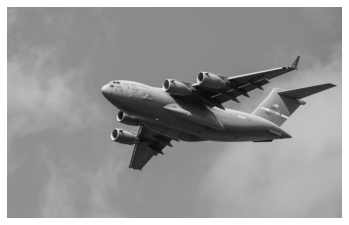

In [6]:
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()


In [7]:
type(image)

numpy.ndarray

In [8]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [9]:
image.shape

(2270, 3600)

In [10]:
image[0,0]

140

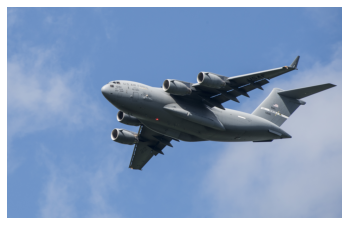

In [16]:
# Load image in color
image_bgr = cv2.imread("Data/images/plane.jpg", cv2.IMREAD_COLOR)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


In [13]:
# show pixel 
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

In [ ]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


#### See Also 
[RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)

[Diference between RGB and BGR](https://lifearoundkaur.wordpress.com/2015/08/04/difference-between-rgb-and-bgr/)

###  8.2 Saving images

In [18]:
# Load image as grayscale
image = cv2.imread("Data/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Save image
cv2.imwrite("Data/images/plane_new.jpg", image)


True

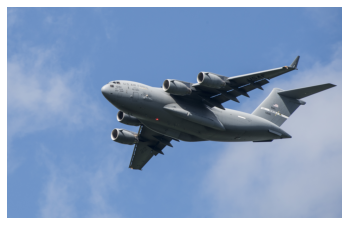

In [19]:
# Load image as grayscale
image = cv2.imread("Data/images/plane_new.jpg", cv2.IMREAD_GRAYSCALE)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


### 8.3 Resizing Images

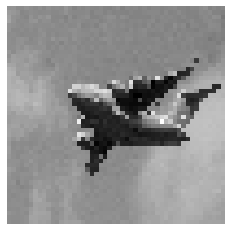

In [21]:
# Load image as grayscale
image = cv2.imread("Data/images/plane_new.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()


#### Discussion 

Resizing images is a common task in image preprocessing for two reasons. First, images come in all shapes and sizes, and to be usable as features, images must have the same dimensions. This standardization of image size does come with costs, however; images are matrices of information and when we reduce the size of the image we are reducing the size of that matrix and the information it contains. Second, machine learning can require thousands or hundreds of thousands of images. When those images are very large they can take up a lot of memory, and by resizing them we can dramatically reduce memory usage. Some common image sizes for machine learning are 32 × 32, 64 × 64, 96 × 96, and 256 × 256.


#### 8.4 Croping Images
    
Croping is when we want to remove the outer portion of the image to change its dimensions.


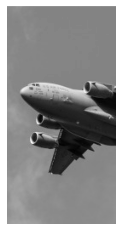

In [31]:
# Load image in grayscale
image = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Select first half of the columns and all rows
image_cropped = image[:,:128]

# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()


#### Discussion 

Since OpenCV represents images as a matrix of elements, by selecting the rows and columns we want to keep we are able to easily crop the image. Cropping can be particularly useful if we know that we only want to keep a certain part of every image. For example, if our images come from a stationary security camera we can crop all the images so they only contain the area of interest.

#### See Also 
[Slicing NumPy Arrays](https://docs.scipy.org/doc/numpy/user/basics.indexing.html)


### 8.5 Blurring images

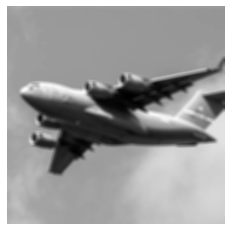

In [27]:
# Load image as grayscale
image = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Blur image
image_blurry = cv2.blur(image, (5,5))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

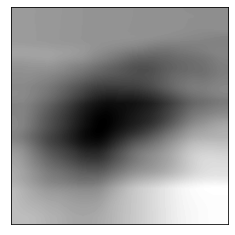

In [28]:
#To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel: # Blur image
image_very_blurry = cv2.blur(image, (100,100))

# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()


#### Discussion 

Kernels are widely used in image processing to do everything from sharpening to edge detection, and will come up repeatedly in this chapter. The blurring kernel we used looks like this: # Create kernel


In [29]:
kernel = np.ones((5,5)) / 25.0

# Show kernel
kernel


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

The center element in the kernel is the pixel being examined, while the remaining elements are its neighbors. Since all elements have the same value (normalized to add up to 1), each has an equal say in the resulting value of the pixel of interest. We can manually apply a kernel to an image using filter2D to produce a similar blurring effect:



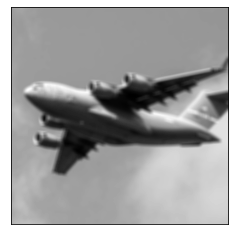

In [30]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()


#### See Also

[Image Kernels Explained Visually](https://setosa.io/ev/image-kernels/)

[Common Image Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))


### 8.6 Sharpening Images

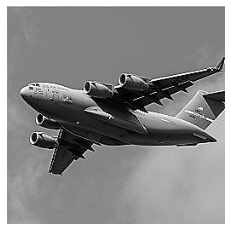

In [33]:
# Load image as grayscale
image = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

#### Discussion 

Sharpening works similarly to blurring, except instead of using a kernel to average the neighboring values, we constructed a kernel to highlight the pixel itself. The resulting effect makes contrasts in edges stand out more in the image.


### 8.7 Enhancing Contrast

#### Problem 

We want to increase the contrast between pixels in an image. 

#### Solution 

Histogram equalization is a tool for image processing that can make objects and shapes stand out. When we have a grayscale image, we can apply OpenCV’s equalizeHist directly on the image:


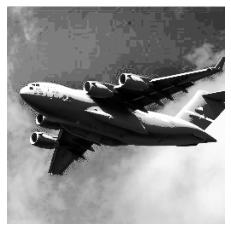

In [35]:
# Load image
image = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()


However, when we have a color image, we first need to convert the image to the YUV color format. The Y is the luma, or brightness, and U and V denote the color. After the conversion, we can apply equalizeHist to the image and then convert it back to BGR or RGB: 

In [37]:
# Load image
image_bgr = cv2.imread("Data/images/plane.jpg")

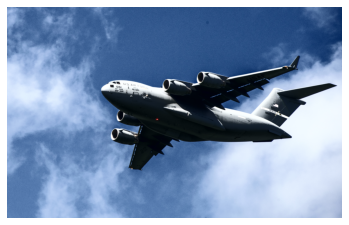

In [38]:
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


#### Discussion

While a detailed explanation of how histogram equalization works is beyond the scope of this book, the short explanation is that it transforms the image so that it uses a wider range of pixel intensities. While the resulting image often does not look “realistic,” we need to remember that the image is just a visual representation of the underlying data. If histogram equalization is able to make objects of interest more distinguishable from other objects or backgrounds (which is not always the case), then it can be a valuable addition to our image preprocessing pipeline.



###  8.8 Isolating Colors

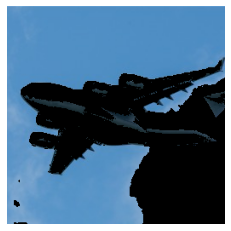

In [40]:
# Load image
image_bgr = cv2.imread('Data/images/plane_256x256.jpg')

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


#### Discussion

Isolating colors in OpenCV is straightforward. First we convert an image into HSV (hue, saturation, and value). Second, we define a range of values we want to isolate, which is probably the most difficult and time-consuming part. Third, we create a mask for the image (we will only keep the white areas):


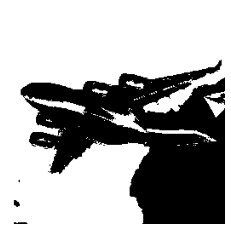

In [43]:
 # Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()


### 8.9 Binarizing Images 

#### Problem

Given an image, you want to output a simplified version. 

#### Solution 

Thresholding is the process of setting pixels with intensity greater than some value to be white and less than the value to be black. A more advanced technique is adaptive thresholding, where the threshold value for a pixel is determined by the pixel intensities of its neighbors. This can be helpful when lighting conditions change over different regions in an image:


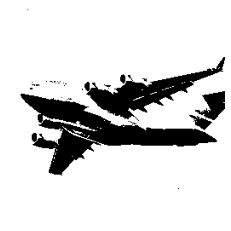

In [44]:
# Load image as grayscale
image_grey = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()


#### Discussion 

Our solution has four important arguments in adaptiveThreshold. max_output_value simply determines the maximum intensity of the output pixel intensities. cv2.ADAPTIVE_THRESH_GAUSSIAN_C sets a pixel’s threshold to be a weighted sum of the neighboring pixel intensities. The weights are determined by a Gaussian window. Alternatively we could set the threshold to simply the mean of the neighboring pixels with cv2.ADAPTIVE_THRESH_MEAN_C: 

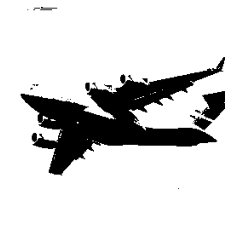

In [45]:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

The last two parameters are the block size (the size of the neighborhood used to determine a pixel’s threshold) and a constant subtracted from the calculated threshold (used to manually fine-tune the threshold). A major benefit of thresholding is denoising an image — keeping only the most important elements. For example, thresholding is often applied to photos of printed text to isolate the letters from the page.


### 8.10 Removing Backgrounds 

#### Problem 

You want to isolate the foreground of an image. 

#### Solution 

Mark a rectangle around the desired foreground, then run the GrabCut algorithm:


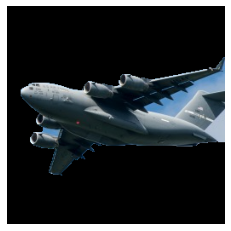

In [46]:
# Load image and convert to RGB
image_bgr = cv2.imread('Data/images/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()


#### Discussion 

The first thing we notice is that even though GrabCut did a pretty good job, there are still areas of background left in the image. We could go back and manually mark those areas as background, but in the real world we have thousands of images and manually fixing them individually is not feasible. Therefore, we would do well by simply accepting that the image data will still contain some background noise. In our solution, we start out by marking a rectangle around the area that contains the foreground. GrabCut assumes everything outside this rectangle to be background and uses that information to figure out what is likely background inside the square (to learn how the algorithm does this, check out the external resources at the end of this solution). Then a mask is created that denotes the different definitely/likely background/foreground regions: 


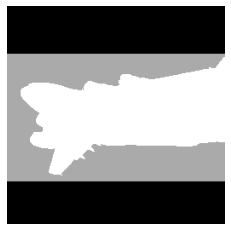

In [47]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

The black region is the area outside our rectangle that is assumed to be definitely background. The gray area is what GrabCut considered likely background, while the white area is likely foreground. This mask is then used to create a second mask that merges the black and gray regions: 

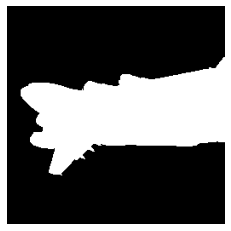

In [48]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()


The second mask is then applied to the image so that only the foreground remains.

### 8.11 Detecting Edges 

#### Problem 

You want to find the edges in an image. 

#### Solution 

Use an edge detection technique like the Canny edge detector:


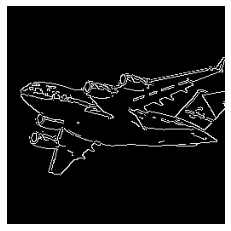

In [51]:
# Load image at gray scale
image_gray = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()


#### Discussion 

Edge detection is a major topic of interest in computer vision. Edges are important because they are areas of high information. For example, in our image one patch of sky looks very much like another and is unlikely to contain unique or interesting information. However, patches where the background sky meets the airplane contain a lot of information (e.g., an object’s shape). Edge detection allows us to remove low-information areas and isolate the areas of images containing the most information. There are many edge detection techniques (Sobel filters, Laplacian edge detector, etc.). However, our solution uses the commonly used Canny edge detector. How the Canny detector works is too detailed for this book, but there is one point that we need to address. The Canny detector requires two parameters denoting low and high gradient threshold values. Potential edge pixels between the low and high thresholds are considered weak edge pixels, while those above the high threshold are considered strong edge pixels. OpenCV’s Canny method includes the low and high thresholds as required parameters. In our solution, we set the lower and upper thresholds to be one standard deviation below and above the image’s median pixel intensity. However, there are often cases when we might get better results if we used a good pair of low and high threshold values through manual trial and error using a few images before running Canny on our entire collection of images.

#### See Also 

[Canny Edge Detector](https://en.wikipedia.org/wiki/Canny_edge_detector)

[Canny Edge Detection Auto Thresholding](http://www.kerrywong.com/2009/05/07/canny-edge-detection-auto-thresholding/)




### 8.12 Detecting Corners 

#### Problem 

You want to detect the corners in an image. 

#### Solution 

Use OpenCV’s implementation of the Harris corner detector, cornerHarris:


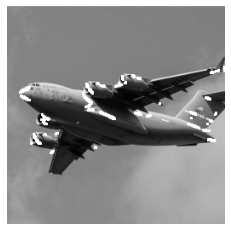

In [52]:
# Load image at gray scale
image_gray = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()


#### Discussion 

The Harris corner detector is a commonly used method of detecting the intersection of two edges. Our interest in detecting corners is motivated by the same reason as for deleting edges: corners are points of high information. A complete explanation of the Harris corner detector is available in the external resources at the end of this recipe, but a simplified explanation is that it looks for windows (also called neighborhoods or patches) where small movements of the window (imagine shaking the window) creates big changes in the contents of the pixels inside the window. cornerHarris contains three important parameters that we can use to control the edges detected. First, block_size is the size of the neighbor around each pixel used for corner detection. Second, aperture is the size of the Sobel kernel used (don’t worry if you don’t know what that is), and finally there is a free parameter where larger values correspond to identifying softer corners. The output is a grayscale image depicting potential corners: 

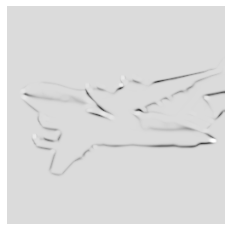

In [54]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()


We then apply thresholding to keep only the most likely corners. Alternatively, we can use a similar detector, the Shi-Tomasi corner detector, which works in a similar way to the Harris detector (goodFeaturesToTrack) to identify a fixed number of strong corners. goodFeaturesToTrack takes three major parameters — the number of corners to detect, the minimum quality of the corner (0 to 1), and the minimum Euclidean distance between corners: 

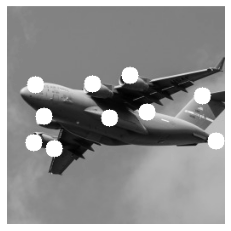

In [57]:
# Load images
image_bgr = cv2.imread('Data/images/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)

# Draw white circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

# Convert to grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()


#### See Also 

[OpenCV’s cornerHarris](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=goodfeaturestotrack#cornerharris)

[OpenCV’s goodFeaturesToTrack](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=goodfeaturestotrack)


### 8.13 Creating Features for Machine Learning 

#### Problem 

You want to convert an image into an observation for machine learning. 

#### Solution 

Use NumPy’s flatten to convert the multidimensional array containing an image’s data into a vector containing the observation’s values:


In [59]:
# Load image as grayscale
image = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()


array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

#### Discussion 

Images are presented as a grid of pixels. If an image is in grayscale, each pixel is presented by one value (i.e., pixel intensity: 1 if white, 0 if black). For example, imagine we have a 10 × 10–pixel image: 

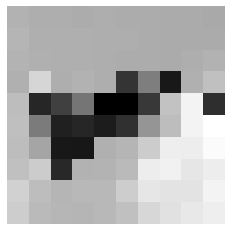

In [60]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()


In [ ]:
# In this case the dimensions of the images data will be 10 × 10: 

image_10x10.shape 

# And if we flatten the array, we get a vector of length 100 (10 multiplied by 10): 

image_10x10.flatten().shape 


This is the feature data for our image that can be joined with the vectors from other images to create the data 
we will feed to our machine learning algorithms.

If the image is in color, instead of each pixel being represented by one value, it is represented by multiple values (most often three) representing the channels (red, green, blue, etc.) that blend to make the final color of that pixel. For this reason, if our 10 × 10 image is in color, we will have 300 feature values for each observation:



In [63]:
# Load image in color
image_color = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)

# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape


(300,)

One of the major challenges of image processing and computer vision is that since every pixel location in a collection of images is a feature, as the images get larger, the number of features explodes: # Load image in grayscale


In [66]:
image_256x256_gray = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape 

# And the number of features only intensifies when the image is in color: # Load image in color
image_256x256_color = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape 


(196608,)

As the output shows, even a small color image has almost 200,000 features, which can cause problems when we are training our models because the number of features might far exceed the number of observations.This problem will motivate dimensionality strategies discussed in a later chapter, which attempt to reduce the number of features while not losing an excessive amount of information contained in the data. 

### 8.14 Encoding Mean Color as a Feature 

#### Problem

You want a feature based on the colors of an image. 

#### Solution 

Each pixel in an image is represented by the combination of multiple color channels (often three: red, green, and blue). Calculate the mean red, green, and blue channel values for an image to make three color features representing the average colors in that image:

In [71]:
# Load image as BGR
image_bgr = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)

# Calculate the mean of each channel
channels = cv2.mean(image_bgr)

# Swap blue and red values (making it RGB, not BGR)
observation = np.array([(channels[2], channels[1], channels[0])])

# Show mean channel values
observation 

array([[ 90.52377319, 133.11940002, 169.02355957]])

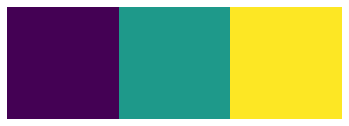

In [72]:
#We can view the mean channel values directly (apologies to printed book readers):

plt.imshow(observation), plt.axis("off")
plt.show()


#### Discussion 

The output is three feature values for an observation, one for each color channel in the image. These features can be used like any other features in learning algorithms to classify images according to their colors. 

### 8.15 Encoding Color Histograms as Features 

#### Problem 

You want to create a set of features representing the colors appearing in an image.

#### Solution 

Compute the histograms for each color channel:

In [75]:
# Load image
image_bgr = cv2.imread("Data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    features.extend(histogram)

# Create a vector for an observation's feature values
observation = np.array(features).flatten()

# Show the observation's value for the first five features
observation[0:5]


array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

#### Discussion

In the RGB color model, each color is the combination of three color channels (i.e., red, green, blue). In turn, each channel can take on one of 256 values (represented by an integer between 0 and 255). For example, the top-leftmost pixel in our image has the following channel values: 

In [78]:
# Show RGB channel values
image_rgb[0,0] 


array([107, 163, 212], dtype=uint8)

A histogram is a representation of the distribution of values in data. Here is a simple example:


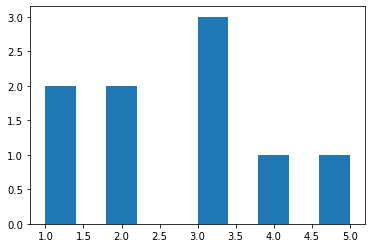

In [80]:
import pandas as pd

# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])

# Show the histogram
data.hist(grid=False)
plt.show()


In this example, we have some data with two 1s, two 2s, three 3s, one 4, and one 5. In the histogram, each bar represents the number of times each value (1, 2, etc.) appears in our data. We can apply this same technique to each of the color channels, but instead of five possible values, we have 256 (the range of possible values for a channel value). The x-axis represents the 256 possible channel values, and the y-axis represents the number of times a particular channel value appears across all pixels in an image:

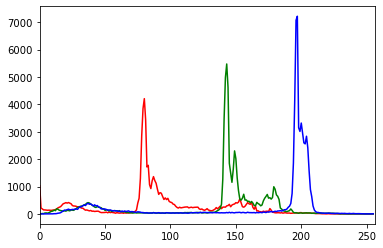

In [82]:
 # Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])

# Show plot
plt.show()


As we can see in the histogram, barely any pixels contain the blue channel values between 0 and ~180, while many pixels contain blue channel values between ~190 and ~210. This distribution of channel values is shown for all three channels. The histogram, however, is not simply a visualization; it is 256 features for each color channel, making for 768 total features representing the distribution of colors in an image.


#### See Also 

[Histogram  pandas](https://en.wikipedia.org/wiki/Histogram)

[Histogram documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[OpenCV Histogram tutorial](https://docs.opencv.org/3.2.0/d1/db7/tutorial_py_histogram_begins.html)
